# CS6140 Assignment 2: Lending Club Classification
Suhkrobbek Ilyosbekov

## Setup
Import the required packages and load the lending club dataset from CSV file.

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add the parent directory to the Python path to import the core module
sys.path.append(os.path.abspath(os.path.join("..")))

from core import get_data_path

csv_file_path = get_data_path("assignment2/lc_14to16.csv")
data = pd.read_csv(csv_file_path)

C:\Users\suxro\AppData\Local\Temp\ipykernel_16500\2447354417.py:13: DtypeWarning: Columns (19,59,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_path)


## 1. Summary (Exploratory Data Analysis)
Perform EDA to analyze the differences between the two datasets (before and after the 2015 controversy).

Histograms used to compare the distribution of the loan amount, annual income, and debt-to-income ratio.

Total columns in original dataset:  152
Total rows in original dataset:  1091131
Total rows in dataset before 2015: 235629
Total rows in dataset after 2015: 855502
First few rows of the dataset: 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Period
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,After 2015
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,After 2015
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,After 2015
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,After 2015
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,After 2015


Summary Statistics: 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1.091131e+06,0.0,1.091131e+06,1.091131e+06,1.091131e+06,1.091131e+06,1.091131e+06,1.091131e+06,1091131,1.091066e+06,...,7572.0,7572.000000,7572.0,7572.000000,5954.000000,7572.000000,7572.000000,27193.000000,27193.000000,27193.000000
mean,5.814955e+07,NaN,1.495881e+04,1.495878e+04,1.495290e+04,1.302811e+01,4.428704e+02,7.751796e+04,2015-08-26 16:12:01.154105088,1.879634e+01,...,3.0,139.023246,3.0,13.969361,406.504122,10486.839839,184.214666,4874.077188,47.365733,13.090097
min,5.571600e+04,NaN,1.000000e+03,1.000000e+03,7.750000e+02,5.320000e+00,1.401000e+01,0.000000e+00,2014-01-01 00:00:00,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.450000,0.000000
25%,4.021801e+07,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.581000e+02,4.700000e+04,2015-02-01 00:00:00,1.235000e+01,...,3.0,52.955000,3.0,6.000000,155.310000,5073.072500,42.927500,2122.000000,45.000000,6.000000
50%,6.147308e+07,NaN,1.305000e+04,1.305000e+04,1.302500e+04,1.269000e+01,3.815500e+02,6.500000e+04,2015-10-01 00:00:00,1.823000e+01,...,3.0,107.510000,3.0,15.000000,313.650000,9085.635000,126.810000,4082.000000,45.000000,12.000000
75%,7.717113e+07,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.561000e+01,5.839100e+02,9.200000e+04,2016-04-01 00:00:00,2.480000e+01,...,3.0,190.132500,3.0,23.000000,557.557500,14568.247500,268.575000,6727.000000,50.000000,18.000000
max,9.645316e+07,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.584900e+03,9.573072e+06,2016-12-01 00:00:00,9.990000e+02,...,3.0,769.030000,3.0,37.000000,2307.090000,36605.830000,1407.860000,30000.000000,521.350000,112.000000
std,2.444354e+07,NaN,8.716084e+03,8.716085e+03,8.713271e+03,4.594463e+00,2.554981e+02,7.181074e+04,NaN,9.360157e+00,...,0.0,115.402085,0.0,9.709578,335.049453,6817.138557,187.290602,3555.105553,6.836303,7.813901


Missing values count:


member_id                1091131
emp_title                  65603
emp_length                 64050
desc                     1075784
title                      23305
                          ...   
settlement_status        1063938
settlement_date          1063938
settlement_amount        1063938
settlement_percentage    1063938
settlement_term          1063938
Length: 75, dtype: int64

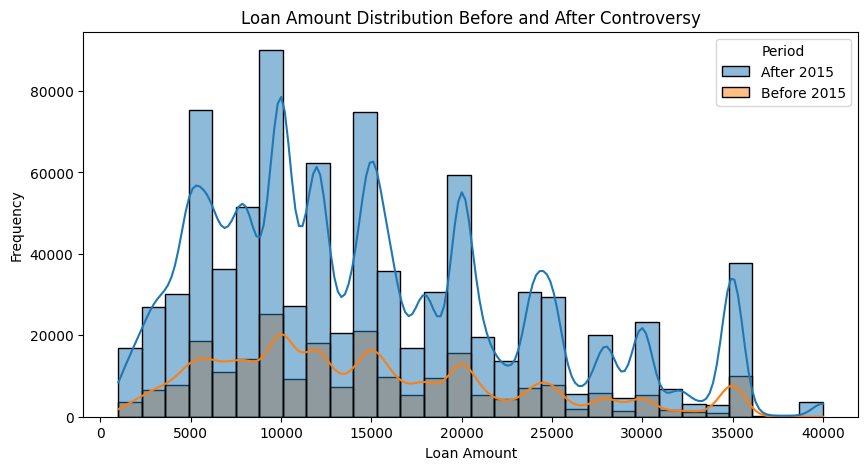

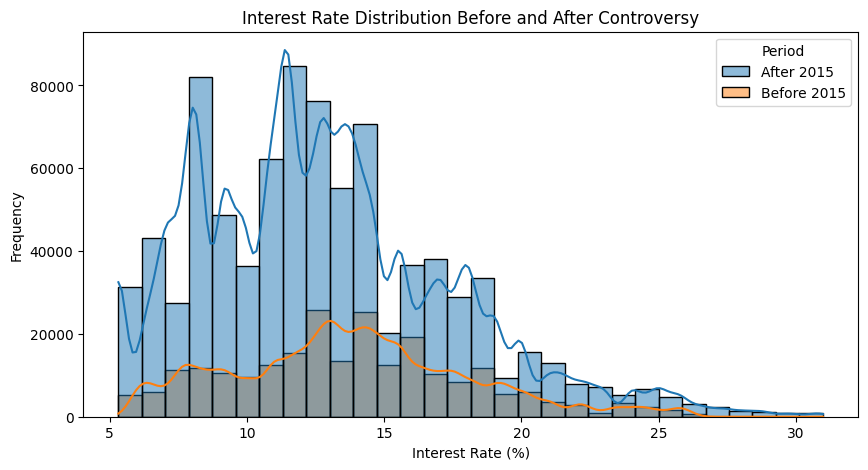

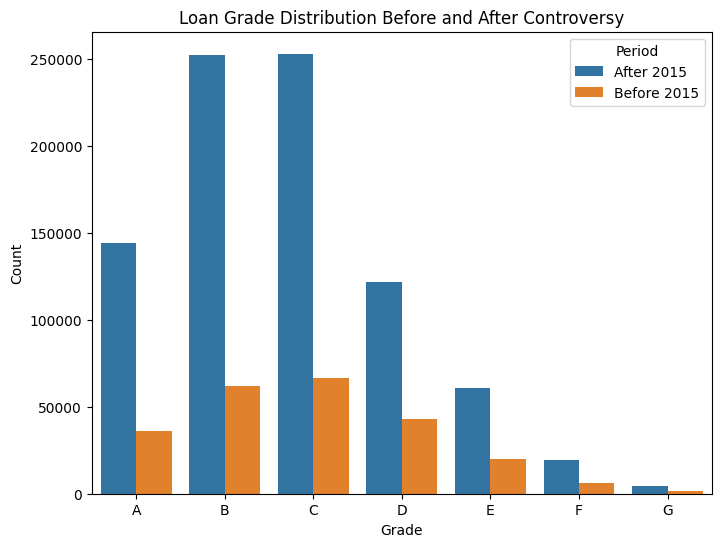

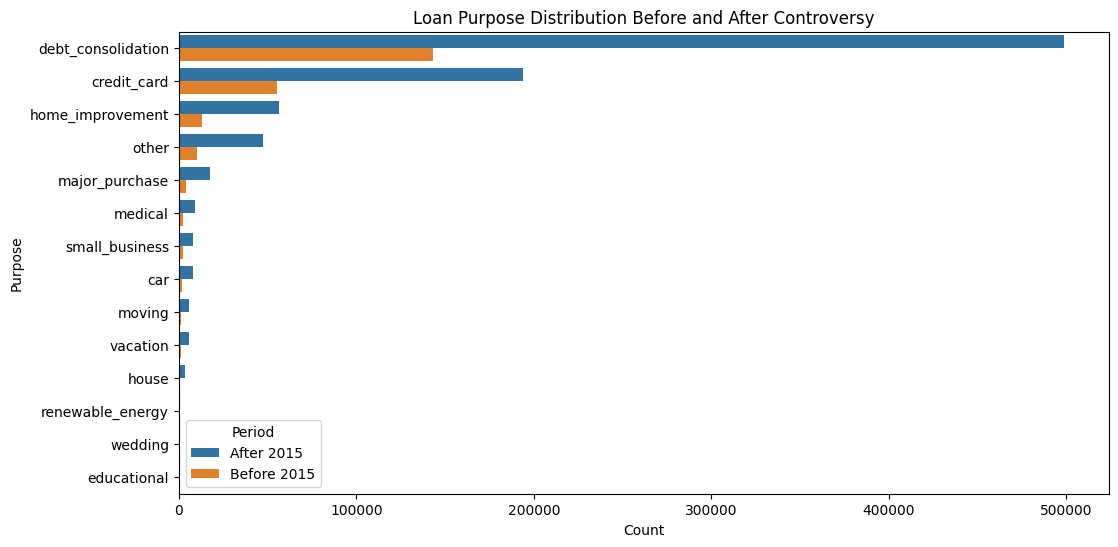

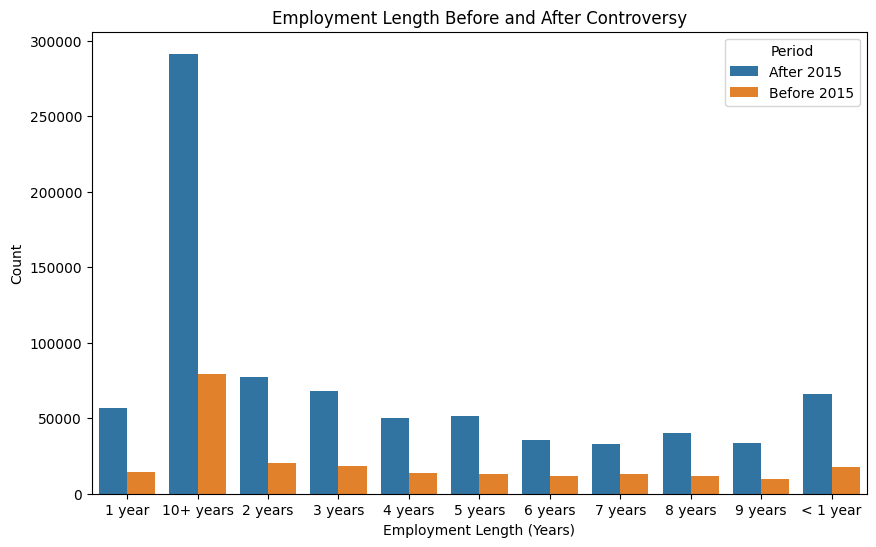

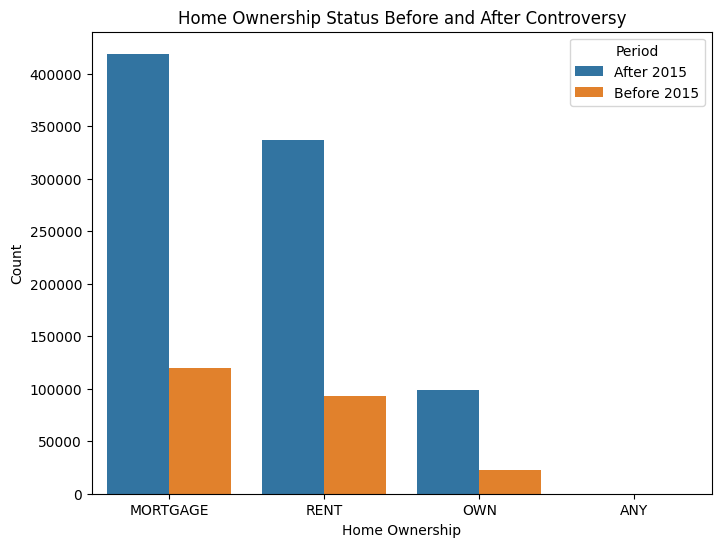

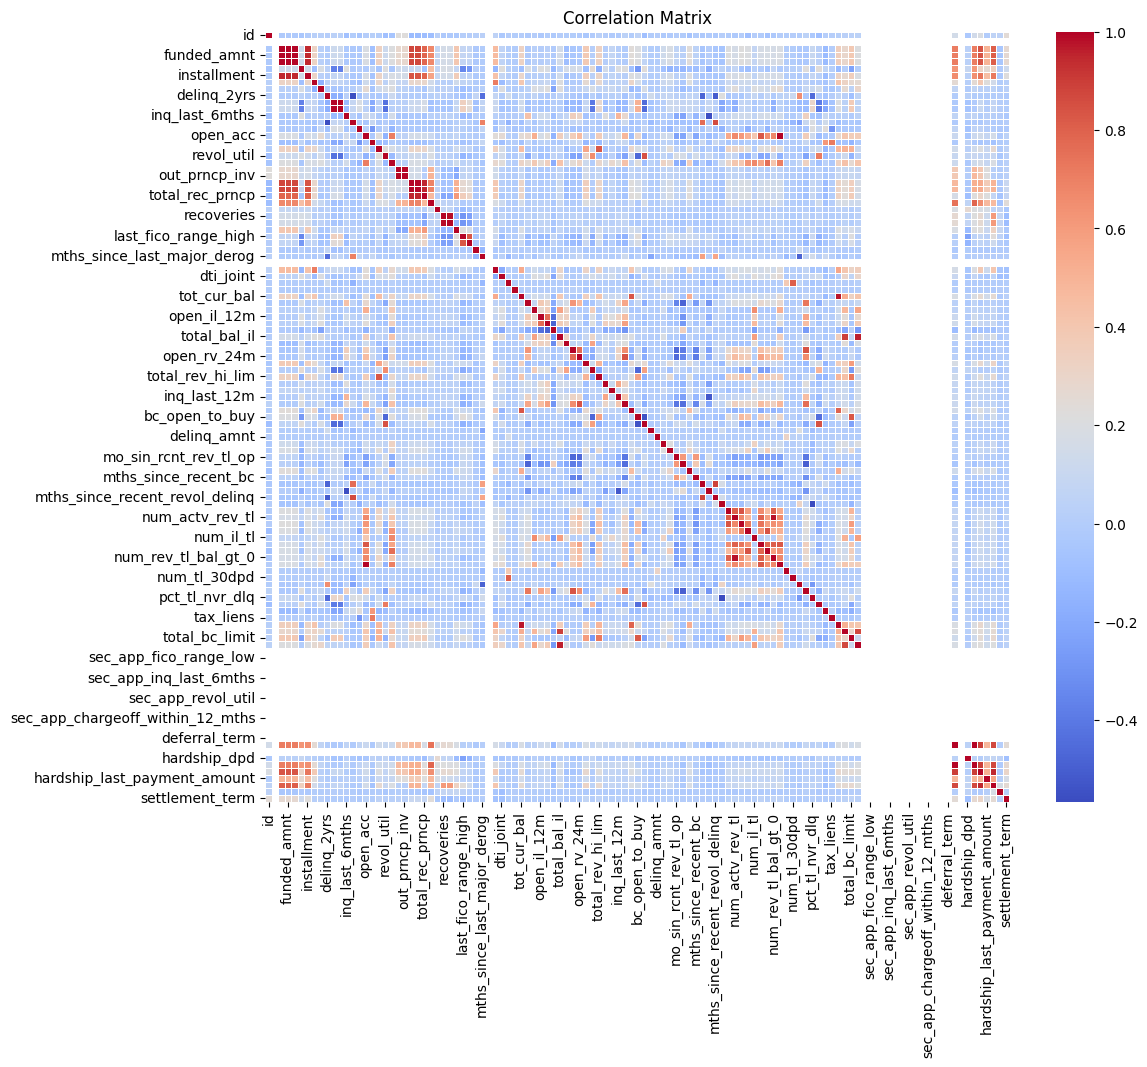

In [2]:
import numpy as np

# Convert issue date to datetime to filter by time period
data["issue_d"] = pd.to_datetime(data["issue_d"])

# Define the controversy date
controversy_date = pd.to_datetime("2015-01-01")

# Create "Period" column based on the controversy date
# Create a new column to indicate the period, values are "Before 2015" and "After 2015"
data["Period"] = np.where(data["issue_d"] < controversy_date, "Before 2015", "After 2015")

# Print basic information for both periods
print("Total columns in original dataset: ", data.shape[1])
print("Total rows in original dataset: ", data.shape[0])
print("Total rows in dataset before 2015:", data[data["Period"] == "Before 2015"].shape[0])
print("Total rows in dataset after 2015:", data[data["Period"] == "After 2015"].shape[0])

# Print the first few rows of the dataset
print("First few rows of the dataset: ")
display(data.head())

# Print the summary statistics of the dataset
print("Summary Statistics: ")
display(data.describe())

# Calculate missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values count:", )
display(missing_values[missing_values > 0])

# Plot distributions for loan amount
plt.figure(figsize=(10,5))
sns.histplot(data, x="loan_amnt", hue="Period", kde=True, bins=30)
plt.title("Loan Amount Distribution Before and After Controversy")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Plot interest rate distribution
plt.figure(figsize=(10,5))
sns.histplot(data, x="int_rate", hue="Period", kde=True, bins=30)
plt.title("Interest Rate Distribution Before and After Controversy")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Plot grade distribution
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="grade", hue="Period", order=sorted(data["grade"].unique()))
plt.title("Loan Grade Distribution Before and After Controversy")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Analyze Differences Between Periods
# Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(data=data, y="purpose", hue="Period", order=data["purpose"].value_counts().index)
plt.title("Loan Purpose Distribution Before and After Controversy")
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.show()

# Employment Length
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="emp_length", hue="Period", order=sorted(data["emp_length"].dropna().unique()))
plt.title("Employment Length Before and After Controversy")
plt.xlabel("Employment Length (Years)")
plt.ylabel("Count")
plt.show()

# Home Ownership
plt.figure(figsize=(8,6))
sns.countplot(data=data, x="home_ownership", hue="Period")
plt.title("Home Ownership Status Before and After Controversy")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()

# Correlation Analysis
# Select numerical features
numerical_features = data.select_dtypes(include=["float64", "int64"]).columns

# Compute correlation matrix
corr_matrix = data[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### **Key Observations from EDA:**

1. **Loan Amount Distribution:**
   - The loan amount distribution showed **similar patterns** before and after the controversy, with the majority of loans concentrated around mid-range amounts (e.g., between $5,000 and $20,000). However, there was a slight increase in the number of higher loan amounts after 2015. This could indicate a shift in the company’s strategy or a change in the type of borrowers following the controversy.

2. **Interest Rate Distribution:**
   - The interest rate distribution remained **largely unchanged** across both periods, with a slightly wider spread after the controversy. This suggests that while the range of interest rates offered remained similar, there may have been more variability in loan terms and borrower risk profiles after 2015.

3. **Loan Grade Distribution:**
   - The most striking difference was observed in the **loan grade distribution**. Before 2015, there was a higher proportion of loans with **higher grades** (A and B). After the controversy, there was an increase in **lower-grade loans** (D, E, F, and G). This could indicate that LendingClub may have relaxed its lending criteria or started accepting riskier borrowers post-controversy, potentially to maintain its loan approval volume.

4. **Loan Purpose Distribution:**
   - The distribution of loan purposes (e.g., debt consolidation, credit card refinancing) remained fairly consistent before and after the controversy. **Debt consolidation** and **credit card refinancing** continued to dominate as the most common reasons for obtaining loans.

5. **Employment Length:**
    - In the **Employment Length** distribution, there is a noticeable difference between the periods **before and after 2015**:

        1. **Before 2015:** 
            - The distribution of employment length shows a higher proportion of borrowers with longer employment histories, especially those with **10+ years of employment**. This indicates that prior to the controversy, LendingClub might have been more conservative in lending, favoring borrowers with more stable, longer-term employment.

        2. **After 2015:**
            - After the controversy, there was an **increase in the number of borrowers with shorter employment lengths**, particularly those with **0-1 years of employment**. This suggests that LendingClub may have started accepting more borrowers with shorter employment histories after 2015. This could reflect a shift in lending policies toward more lenient criteria, potentially to increase loan volumes despite the increased risk.

    The difference in **employment length** distribution before and after the controversy suggests that LendingClub might have lowered its standards for borrower stability, as they began approving more loans for borrowers with shorter employment histories post-2015. This aligns with the overall pattern of LendingClub potentially accepting **riskier borrowers** after the controversy, which is also seen in the increase in **lower-grade loans**. This shift in employment length distribution could play a crucial role in loan risk assessment models, as borrowers with shorter employment histories might have higher default risks, affecting loan grading accuracy and overall risk predictions.

6. **Home Ownership:**
   - In terms of home ownership, **renters** and **mortgage holders** remained the dominant categories. The distribution did not show substantial changes between the two periods.

#### **Correlation Analysis:**
   - The correlation matrix revealed that certain features, such as **loan amount, annual income, and debt-to-income ratio (DTI)**, had **moderate correlations** with each other. This was consistent across both periods, indicating that these features remain key predictors of loan grades and risk levels. However, no drastic changes in the correlation structure were observed pre- and post-controversy.

#### **Insights and Interpretation:**

The EDA provides key insights into how the LendingClub controversy might have influenced lending practices:

1. **Loan Grading Changes:** The increase in lower-grade loans after 2015 suggests that LendingClub might have adjusted its grading criteria post-controversy. This could be due to a combination of factors such as accepting riskier borrowers to maintain business volume or possibly revising their data integrity and grading practices under regulatory pressure.

2. **Riskier Borrowers Post-2015:** The fact that there was an increase in loan amounts coupled with more loans graded in the lower categories (D, E, F, G) post-2015 implies that LendingClub may have faced an influx of higher-risk borrowers after the controversy. This raises concerns about **loan default rates** and the long-term sustainability of their lending practices.

3. **Minimal Impact on Loan Purposes and Borrower Characteristics:** Despite the controversy, the borrower demographics (e.g., employment length, home ownership) and loan purposes did not change drastically. This suggests that while there may have been changes in **loan grading** and possibly **borrower risk profiles**, the types of borrowers and reasons for taking out loans remained largely consistent.

## 2. Preprocessing
### a. Standardize the numerical features and encode the categorical features
In this step, we will standardize the numerical features and encode the categorical features using one-hot encoding.
We use the following fetatures for the classification task:
- loan_amnt
- annual_inc
- dti
- acc_now_delinq
- tot_coll_amt
- tot_cur_bal
- total_rev_hi_lim
- grade
- emp_length
- home_ownership
- delinq_2yrs

For `emp_length` feature, we will combine multiple categories into a single category to reduce the number of unique values.
- Values `< 1 year` and `1 year` will be combined into a single category `0-1 year`.
- Values `2 years`, `3 years`, `4 years`, and `5 years` will be combined into a single category `2-5 years`.
- Values `6 years`, `7 years`, `8 years`, `9 years`, and `10+ years` will be combined into a single category `5+ years`.

In [2]:
# Replace the values in the emp_length column with the new categories
data["emp_length"] = data["emp_length"].replace(["< 1 year", "1 year"], "0-1 years")
data["emp_length"] = data["emp_length"].replace(["2 years", "3 years", "4 years", "5 years"], "2-5 years")
data["emp_length"] = data["emp_length"].replace([ "6 years", "7 years", "8 years", "9 years", "10+ years"], "5+ years")

# Filter out the rows with "ANY" in the home_ownership column
data = data[data["home_ownership"] != "ANY"]

display(data["home_ownership"].value_counts())

# Select the features to be used in the model
features = ["loan_amnt",  "annual_inc", "dti", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "grade", "emp_length", "home_ownership", "delinq_2yrs"]

# Subset the data with the selected features, exclude all other columns
data = data[features]
display(data.head())

home_ownership
MORTGAGE    539136
RENT        430072
OWN         121810
Name: count, dtype: int64

,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,delinq_2yrs
0,3600.0,55000.0,5.91,0.0,722.0,144904.0,9300.0,C,5+ years,MORTGAGE,0.0
1,24700.0,65000.0,16.06,0.0,0.0,204396.0,111800.0,C,5+ years,MORTGAGE,1.0
2,20000.0,63000.0,10.78,0.0,0.0,189699.0,14000.0,B,5+ years,MORTGAGE,0.0
3,35000.0,110000.0,17.06,0.0,0.0,301500.0,67300.0,C,5+ years,MORTGAGE,0.0
4,10400.0,104433.0,25.37,0.0,0.0,331730.0,34000.0,F,2-5 years,MORTGAGE,1.0


In [3]:
from sklearn.discriminant_analysis import StandardScaler

# Standardize the numerical variables
scaler = StandardScaler()
numerical_vars = ["loan_amnt", "annual_inc", "dti", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

print("Data after standardization:")
display(data.head())

# Display the number of missing values in each column
print("Missing values before dropna:")
display(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()
print("Missing values after dropna:")
display(data.isnull().sum())

Data after standardization:


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,emp_length,home_ownership,delinq_2yrs
0,-1.303220,-0.313560,-1.376684,-0.073154,0.050524,0.022563,-0.654247,C,5+ years,MORTGAGE,0.0
1,1.117573,-0.174304,-0.292318,-0.073154,-0.029361,0.401098,2.153184,C,5+ years,MORTGAGE,1.0
2,0.578344,-0.202155,-0.856402,-0.073154,-0.029361,0.307584,-0.525516,B,5+ years,MORTGAGE,0.0
3,2.299287,0.452350,-0.185483,-0.073154,-0.029361,1.018950,0.934348,C,5+ years,MORTGAGE,0.0
4,-0.523059,0.374826,0.702308,-0.073154,-0.029361,1.211297,0.022276,F,2-5 years,MORTGAGE,1.0


Missing values before dropna:


loan_amnt               0
annual_inc              0
dti                    65
acc_now_delinq          0
tot_coll_amt            0
tot_cur_bal             0
total_rev_hi_lim        0
grade                   0
emp_length          64042
home_ownership          0
delinq_2yrs             0
dtype: int64

Missing values after dropna:


loan_amnt           0
annual_inc          0
dti                 0
acc_now_delinq      0
tot_coll_amt        0
tot_cur_bal         0
total_rev_hi_lim    0
grade               0
emp_length          0
home_ownership      0
delinq_2yrs         0
dtype: int64

#### Encode categorical features using one-hot encoding
In this step, encode the categorical features such as `home_ownership`, and `emp_length` using one-hot encoding.

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Encoding categorical features: "emp_length", "home_ownership"
one_hot_encoder = OneHotEncoder(sparse_output=False)
categorical_features = ["emp_length", "home_ownership"]

# Encode the categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features)

print("Encoded dataset shape: ", data_encoded.shape)
print("Dataset after encoding:")
display(data_encoded.head())

Encoded dataset shape:  (1026973, 15)
Dataset after encoding:


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,delinq_2yrs,emp_length_0-1 years,emp_length_2-5 years,emp_length_5+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,-1.303220,-0.313560,-1.376684,-0.073154,0.050524,0.022563,-0.654247,C,0.0,False,False,True,True,False,False
1,1.117573,-0.174304,-0.292318,-0.073154,-0.029361,0.401098,2.153184,C,1.0,False,False,True,True,False,False
2,0.578344,-0.202155,-0.856402,-0.073154,-0.029361,0.307584,-0.525516,B,0.0,False,False,True,True,False,False
3,2.299287,0.452350,-0.185483,-0.073154,-0.029361,1.018950,0.934348,C,0.0,False,False,True,True,False,False
4,-0.523059,0.374826,0.702308,-0.073154,-0.029361,1.211297,0.022276,F,1.0,False,True,False,True,False,False


### 2.b Identify and remove up to 1% of rows as outliers
In this step, we will identify and remove up to 1% of rows as outliers based on the standardized `dti`, `annualincome`, and `delinq_2yrs` variables. We will use the IQR method to detect outliers and remove them from the dataset.

In [8]:
# Features to check for outliers
outlier_features = ["dti", "annual_inc", "delinq_2yrs"]

# Standardize these features (if not already done)
data_encoded[outlier_features] = scaler.fit_transform(data_encoded[outlier_features])

# Sum the absolute standardized scores
data_encoded["outlier_score"] = data_encoded[outlier_features].abs().sum(axis=1)

# Calculate IQR
Q1 = data_encoded["outlier_score"].quantile(0.25)
Q3 = data_encoded["outlier_score"].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_encoded[
    (data_encoded["outlier_score"] < lower_bound) | 
    (data_encoded["outlier_score"] > upper_bound)
]

# Determine the number of outliers to remove (up to 1% of total data)
max_outliers = int(0.01 * len(data_encoded))
outliers_to_remove = outliers.head(max_outliers)

# Remove outliers
data_cleaned = data_encoded.drop(outliers_to_remove.index).reset_index(drop=True)

# Remove temporary columns
data_cleaned = data_cleaned.drop(columns=["outlier_score"])

# Calculate the percentage of data retained
retained_data_percent = (data_cleaned.shape[0] / data.shape[0]) * 100

# Check the shape of the cleaned data
print("Original data shape:", data_encoded.shape)
print("Cleaned data shape:", data_cleaned.shape)
print("Number of outliers removed:", outliers_to_remove.shape[0])
print("Percentage of data retained: {:.2f}%".format(retained_data_percent))

Original data shape: (1026973, 16)
Cleaned data shape: (1016704, 15)
Number of outliers removed: 10269
Percentage of data retained: 99.00%


#### Map Loan Grades to Target Variables.
We will create two new target variables based on the loan grade:

- High-Low Schema: Grades A and B are "High", Grades D, E, F, G are "Low". Grade C is excluded.
- High-Medium-Low Schema: Grades A and B are "High", Grade C is "Medium", Grades D, E, F, G are "Low".

In [9]:
import numpy as np

# Map the grade to high and low categories
def map_high_low(grade: str) -> str | float:
    if grade in ["A", "B"]:
        return "High"
    elif grade in ["D", "E", "F", "G"]:
        return "Low"
    else:
        return np.nan  # Exclude "C"

# Map the grade to high, medium, and low categories
def map_high_med_low(grade: str) -> str | float:
    if grade in ["A", "B"]:
        return "High"
    elif grade == "C":
        return "Medium"
    elif grade in ["D", "E", "F", "G"]:
        return "Low"
    else:
        return np.nan
    
# Create a copy of the cleaned data for the high-low dataset
data_hl = data_cleaned.copy()

# Create a copy of the cleaned data for the high-medium-low dataset
data_hml = data_cleaned.copy()

# Apply the mapping functions
data_hl["high_low"] = data_hl["grade"].map(map_high_low)
data_hml["high_med_low"] = data_hml["grade"].map(map_high_med_low)

# Drop rows with missing values
data_hl = data_hl.dropna(subset=["high_low"]).reset_index(drop=True)
data_hml = data_hml.dropna(subset=["high_med_low"]).reset_index(drop=True)

print("High-Low dataset shape:", data_hl.shape)
print("High-Low dataset:")
display(data_hl.head())

print("High-Medium-Low dataset shape:", data_hml.shape)
print("High-Medium-Low dataset:")
display(data_hml.head())

High-Low dataset shape: (719242, 16)
High-Low dataset:


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,delinq_2yrs,emp_length_0-1 years,emp_length_2-5 years,emp_length_5+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,high_low
0,0.578344,-0.221423,-0.905198,-0.073154,-0.029361,0.307584,-0.525516,B,-0.380643,False,False,True,True,False,False,High
1,-0.523059,0.346107,0.764440,-0.073154,-0.029361,1.211297,0.022276,F,0.686828,False,True,False,True,False,False,Low
2,0.578344,1.381188,-0.460038,-0.073154,-0.029361,1.393450,1.671128,B,-0.380643,False,False,True,True,False,False,High
3,0.578344,0.079923,-0.123593,-0.073154,-0.029361,0.001547,-0.511821,B,0.686828,False,False,True,True,False,False,High
4,-0.568951,0.079923,-0.643137,-0.073154,0.893526,-0.721546,-0.079066,A,-0.380643,False,False,True,False,False,True,High


High-Medium-Low dataset shape: (1016704, 16)
High-Medium-Low dataset:


,loan_amnt,annual_inc,dti,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade,delinq_2yrs,emp_length_0-1 years,emp_length_2-5 years,emp_length_5+ years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,high_med_low
0,-1.303220,-0.331003,-1.462507,-0.073154,0.050524,0.022563,-0.654247,C,-0.380643,False,False,True,True,False,False,Medium
1,1.117573,-0.194028,-0.300970,-0.073154,-0.029361,0.401098,2.153184,C,0.686828,False,False,True,True,False,False,Medium
2,0.578344,-0.221423,-0.905198,-0.073154,-0.029361,0.307584,-0.525516,B,-0.380643,False,False,True,True,False,False,High
3,2.299287,0.422361,-0.186533,-0.073154,-0.029361,1.018950,0.934348,C,-0.380643,False,False,True,True,False,False,Medium
4,-0.523059,0.346107,0.764440,-0.073154,-0.029361,1.211297,0.022276,F,0.686828,False,True,False,True,False,False,Low


## 3. Classification Task
### a. Split the data into Train-Validate-Test
The dataset will be split into **Train**, **Validation**, and **Test** sets in a **70-15-15** ratio. This is a standard approach to avoid overfitting and ensure that the model generalizes well on unseen data. For both **High-Low** and **High-Medium-Low** classification tasks:

- The training set contains **70%** of the data to fit the models.
- The validation set contains **15%** of the data for model tuning.
- The test set contains **15%** of the data for final evaluation of the model’s performance.


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variables
# Features for high-low
X_hl = data_hl.drop(["grade", "high_low"], axis=1)

# Features for high-medium-low
X_hml = data_hml.drop(["grade", "high_med_low"], axis=1)

# Target variables for high-low
y_hl = data_hl["high_low"]

# Target variables for high-medium-low
y_hml = data_hml["high_med_low"]

# Split High-Low data into training and temp sets
X_hl_train, X_hl_temp, y_hl_train, y_hl_temp = train_test_split(
    X_hl, y_hl, test_size=0.3, random_state=42, stratify=y_hl
)

# Split High-Low data temp into validation and test sets
X_hl_val, X_hl_test, y_hl_val, y_hl_test = train_test_split(
    X_hl_temp, y_hl_temp, test_size=0.5, random_state=42, stratify=y_hl_temp
)

# Split High-Medium-Low data into training and temp sets
X_hml_train, X_hml_temp, y_hml_train, y_hml_temp = train_test_split(
    X_hml, y_hml, test_size=0.3, random_state=42, stratify=y_hml
)

# Split High-Medium-Low data temp into validation and test sets
X_hml_val, X_hml_test, y_hml_val, y_hml_test = train_test_split(
    X_hml_temp, y_hml_temp, test_size=0.5, random_state=42, stratify=y_hml_temp
)

print("High-Low data training set size:", X_hl_train.shape)
print("High-Low data validation set size:", X_hl_val.shape)
print("High-Low data test set size:", X_hl_test.shape)

print("High-Medium-Low data training set size:", X_hml_train.shape)
print("High-Medium-Low data validation set size:", X_hml_val.shape)
print("High-Medium-Low data test set size:", X_hml_test.shape)

High-Low data training set size: (503469, 14)
High-Low data validation set size: (107886, 14)
High-Low data test set size: (107887, 14)
High-Medium-Low data training set size: (711692, 14)
High-Medium-Low data validation set size: (152506, 14)
High-Medium-Low data test set size: (152506, 14)


### 2.b Build a logistic model to accurately predict the High-Low response.
Train the logistic regression model using the training set and then evaluate the model using the validation set.

Logistic Regression (High-Low) validation accuracy: 0.724273770461413
Logistic Regression (High-Low) test accuracy: 0.7269272479538776
Logistic Regression (High-Low) precision: 0.7416370977609201
Logistic Regression (High-Low) recall: 0.8753556213445014
Classification report:
              precision    recall  f1-score   support

        High       0.74      0.88      0.80     69245
         Low       0.67      0.45      0.54     38641

    accuracy                           0.72    107886
   macro avg       0.71      0.66      0.67    107886
weighted avg       0.72      0.72      0.71    107886



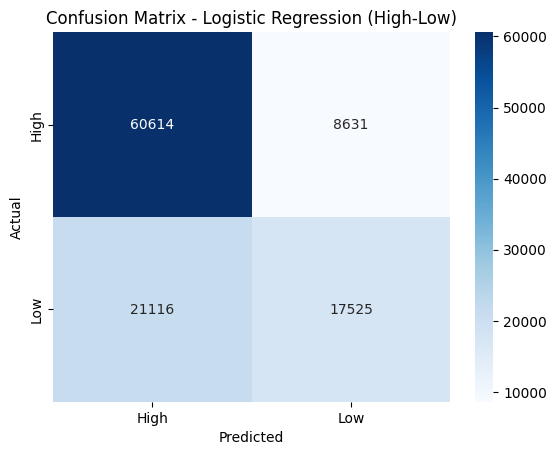

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_hl_train, y_hl_train)

# Make predictions on the validation and test sets
y_val_pred = log_reg.predict(X_hl_val)
y_test_pred = log_reg.predict(X_hl_test)

# Calculate accuracies
accuracy_log_reg = accuracy_score(y_hl_val, y_val_pred)
precision_log_reg = precision_score(y_hl_val, y_val_pred, pos_label="High")
recall_log_reg = recall_score(y_hl_val, y_val_pred, pos_label="High")
test_accuracy_log_reg = accuracy_score(y_hl_test, y_test_pred)

print("Logistic Regression (High-Low) validation accuracy:", accuracy_log_reg)
print("Logistic Regression (High-Low) test accuracy:", test_accuracy_log_reg)
print("Logistic Regression (High-Low) precision:", precision_log_reg)
print("Logistic Regression (High-Low) recall:", recall_log_reg)

# Print classification report
print("Classification report:")
print(classification_report(y_hl_val, y_val_pred))

# Plot confusion matrix
cm = confusion_matrix(y_hl_val, y_val_pred, labels=log_reg.classes_)
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", 
    xticklabels=log_reg.classes_, # type: ignore
    yticklabels=log_reg.classes_  # type: ignore
) 

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (High-Low)")
plt.show()

#### 3.b.i. Discussion of Significant Variables in Logistic Regression (High-Low Response)
In the logistic regression model predicting the **High-Low loan grading** (with "High" being grades A and B, and "Low" being D, E, F, and G), the model achieved a validation accuracy of **72.43%** and a test accuracy of **72.69%**. The precision for predicting "High" grades was **74.16%**, while the recall was significantly higher at **87.53%**. These metrics suggest that the model is better at identifying loans with a "High" grade but struggles more with correctly classifying "Low" grade loans.

The classification report shows a significant imbalance in precision and recall for different classes. While "High" grade loans are identified with good recall, the "Low" grade loans have a lower recall of **45%**, indicating that a considerable portion of these loans is misclassified as "High."

Key significant features could include loan amount (`loan_amnt`), debt-to-income ratio (dti), and annual income (`annual_inc`), as they play crucial roles in determining the risk associated with a loan. For LendingClub, understanding how these variables influence loan grading could be important for future decision-making. High annual incomes and lower DTI ratios likely indicate lower-risk borrowers, who are more likely to be graded "High." Conversely, higher loan amounts and debt-to-income ratios could be associated with "Low" grades, indicating higher risk.

#### Hyperparameter tuning for Logistic Regression using Grid Search Cross-Validation
We will use Grid Search Cross-Validation to tune the hyperparameters of the logistic regression model. The hyperparameters we will tune are:
- **C**: Regularization parameter
  - With following values: **[0.001, 0.01, 0.1, 1, 10, 100, 1000]**

Also, we will use 5-fold cross-validation to find the best hyperparameters and use multi cores to speed up the process.

In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for logistic regression
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Perform grid search with cross-validation,
# parameter n_jobs=-1 means that all available CPU cores will be used for computation
grid_search_log_reg = GridSearchCV(log_reg, param_grid, scoring="accuracy", cv=5, n_jobs=-1)

# Train the model
grid_search_log_reg.fit(X_hl_train, y_hl_train)

# Get the best model
best_log_reg = grid_search_log_reg.best_estimator_

print("Best parameters:", grid_search_log_reg.best_params_)
print("Best score:", grid_search_log_reg.best_score_)
print("Best estimator:", best_log_reg)

results = pd.DataFrame(grid_search_log_reg.cv_results_)
display(results)

Best parameters: {'C': 10}
Best score: 0.726777616846282
Best estimator: LogisticRegression(C=10, max_iter=1000, random_state=42)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.757897,0.292689,0.314109,0.036765,0.001,{'C': 0.001},0.727074,0.726885,0.725038,0.726419,0.726694,0.726422,0.000725,7
1,2.444033,0.196036,0.322367,0.028345,0.010,{'C': 0.01},0.727382,0.727183,0.725505,0.726846,0.726605,0.726704,0.000657,6
2,2.524319,0.220067,0.306215,0.024896,0.100,{'C': 0.1},0.727600,0.727213,0.725485,0.726786,0.726744,0.726766,0.000712,5
3,2.197315,0.261489,0.338823,0.028217,1.000,{'C': 1},0.727620,0.727233,0.725485,0.726766,0.726764,0.726774,0.000719,4
4,2.390713,0.181428,0.320636,0.020455,10.000,{'C': 10},0.727620,0.727243,0.725505,0.726766,0.726754,0.726778,0.000714,1
5,2.352046,0.125624,0.250678,0.054393,100.000,{'C': 100},0.727620,0.727243,0.725505,0.726766,0.726754,0.726778,0.000714,1
6,1.814993,0.494207,0.157496,0.024739,1000.000,{'C': 1000},0.727620,0.727243,0.725505,0.726766,0.726754,0.726778,0.000714,1


The best hyperparameter for the logistic regression model was found to be **C=10**. 
The accuracy score for this parameter was **72.68%**.

#### ROC Curve and AUC for the Logistic Regression Model

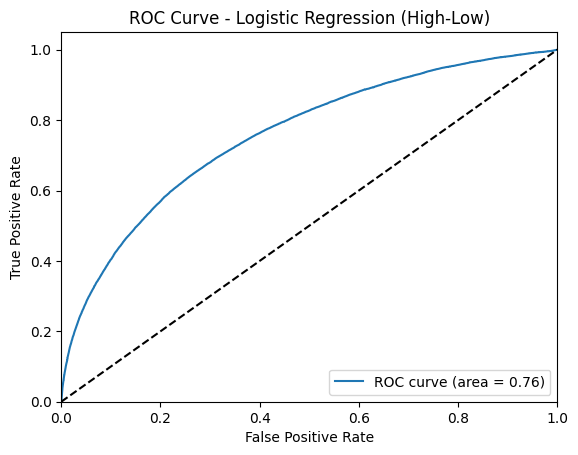

In [11]:
from sklearn.metrics import auc, roc_curve

# Predict on validation set
y_hl_val_pred = best_log_reg.predict(X_hl_val)
y_hl_val_proba = best_log_reg.predict_proba(X_hl_val)[:, 1]  # Probability for "Low"

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_hl_val, y_hl_val_proba, pos_label="Low")
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (High-Low)")
plt.legend(loc="lower right")
plt.show()

The ROC curve for logistic regression was calculated based on the **predicted probabilities** for the validation set.
The AUC value for the ROC curve was around *0.76*, indicating good model performance, with the model effectively distinguishing between High and Low grade loans.
The **high AUC** value confirms that logistic regression performs well at distinguishing between High and Low loans. The model consistently ranks High loans higher than Low loans, though there are some misclassifications.

### 3.c. Build two KNN models predicting both responses (High-Low and High-Medium-Low)

#### Train and predict High-Low response using KNeighborsClassifier model

KNN (High-Low) validation accuracy: 0.7059025267411898
KNN (High-Low) test accuracy: 0.7075829339957548
KNN (High-Low) precision: 0.7469457609268035
KNN (High-Low) recall: 0.8193804606830818
Classification report:
              precision    recall  f1-score   support

        High       0.75      0.82      0.78     69245
         Low       0.61      0.51      0.56     38642

    accuracy                           0.71    107887
   macro avg       0.68      0.66      0.67    107887
weighted avg       0.70      0.71      0.70    107887



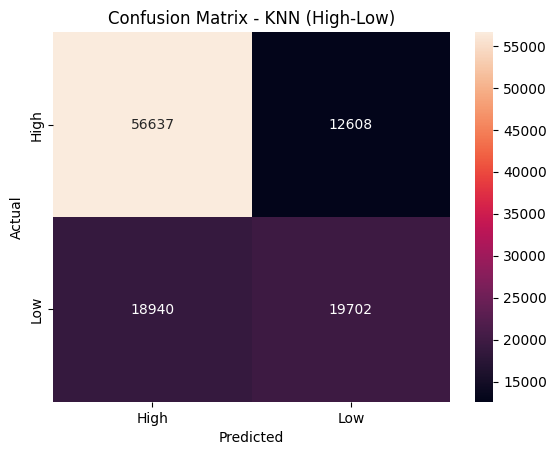

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn_hl = KNeighborsClassifier()

# Train model
knn_hl.fit(X_hl_train, y_hl_train)

# Make predictions on validation and test sets
y_val_pred = knn_hl.predict(X_hl_val)
y_test_pred = knn_hl.predict(X_hl_test)

accuracy_knn_hl = accuracy_score(y_hl_val, y_val_pred)
test_accuracy_knn_hl = accuracy_score(y_hl_test, y_test_pred)
precision_knn_hl = precision_score(y_hl_val, y_val_pred, pos_label="High")
recall_knn_hl = recall_score(y_hl_val, y_val_pred, pos_label="High")

print("KNN (High-Low) validation accuracy:", accuracy_knn_hl)
print("KNN (High-Low) test accuracy:", test_accuracy_knn_hl)
print("KNN (High-Low) precision:", precision_knn_hl)
print("KNN (High-Low) recall:", recall_knn_hl)

print("Classification report:")
print(classification_report(y_hl_test, y_test_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_hl_test, y_test_pred)
sns.heatmap(
    cm, annot=True, fmt="d",
    xticklabels=knn_hl.classes_, # type: ignore
    yticklabels=knn_hl.classes_ # type: ignore
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (High-Low)")
plt.show()

#### Interpretation of KNN Model Performance for High-Low Response
The KNN model performed slightly worse than logistic regression, with lower accuracy (**70.76%**) and recall (**81.94%**). KNN is a non-parametric model that classifies points based on the majority class of their nearest neighbors. While it works well for some datasets, it can be sensitive to high-dimensionality and outliers, which might explain the slightly lower performance in this task.

The precision of **74.69%** indicates that the model performs reasonably well at correctly identifying "High" loans when it predicts them as such. However, its lower recall means it misses more "High" loans compared to logistic regression.

#### Hyperparameter tuning for KNeighborsClassifier using Grid Search Cross-Validation for High-Low response
Hyperparaters tuned:

- `n_neighbors`: The number of neighbors considered for classification. Fewer neighbors lead to more sensitive classifications, while too many neighbors may smooth over important distinctions.
- `weights`: The weight assigned to neighbors, with options for **"uniform"** (all neighbors weighted equally) and **"distance"** (closer neighbors are weighted more).

In [13]:
param_grid = {"n_neighbors": [5, 7, 9, 11], "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

grid_search_knn.fit(X_hl_train, y_hl_train)
best_knn_hl = grid_search_knn.best_estimator_

print("Best parameters:", grid_search_knn.best_params_)
print("Best score:", grid_search_knn.best_score_)
print("Best estimator:", best_knn_hl)

results = pd.DataFrame(grid_search_knn.cv_results_)
display(results)

Best parameters: {'n_neighbors': 11, 'weights': 'uniform'}
Best score: 0.7248648892097067
Best estimator: KNeighborsClassifier(n_neighbors=11)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.541911,0.245831,231.791574,15.005346,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.710032,0.709347,0.707242,0.707281,0.709404,0.708661,0.001168,7
1,4.286801,0.417150,220.539024,12.053097,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.708424,0.707361,0.705474,0.705563,0.707864,0.706937,0.001206,8
2,4.741987,0.439458,260.274107,13.700094,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.718265,0.717580,0.715981,0.713727,0.716564,0.716423,0.001563,5
3,4.302683,0.341609,254.817335,20.576166,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.716984,0.715574,0.714958,0.712873,0.715075,0.715093,0.001323,6
4,6.396522,1.111504,281.934298,18.746970,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.723092,0.723082,0.720510,0.720301,0.721838,0.721764,0.001202,3
5,6.701942,0.951190,266.242461,11.161207,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.722029,0.721890,0.719358,0.719159,0.720517,0.720591,0.001211,4
6,5.016930,0.786894,235.827930,28.771423,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.725287,0.726707,0.723350,0.723211,0.725770,0.724865,0.001373,1
7,4.259391,0.314425,193.381623,5.042162,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.724850,0.726399,0.722714,0.722258,0.724211,0.724086,0.001495,2


The best combination was found to be `n_neighbors = 11` and `weights = 'uniform'` for both the High-Low response.
Using more neighbors (11) improved stability by reducing the influence of outliers, and uniform weighting provided better overall results.
Increasing the number of neighbors reduces overfitting, as each point is classified based on a larger context in the data. The uniform weighting approach was preferred because it ensures each neighbor has an equal say in the classification, which likely smoothed out the high variability seen in this dataset.

#### ROC Curve and AUC for the KNeighborsClassifier Model for High-Low response

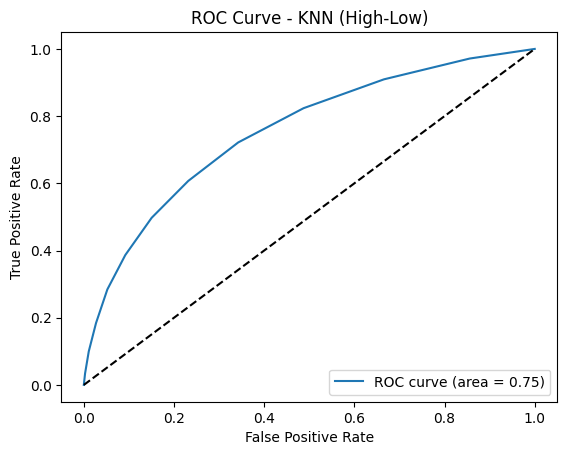

In [14]:
# Predict on validation set using the best model
y_hl_val_pred_knn = best_knn_hl.predict(X_hl_val)
y_hl_val_proba_knn = best_knn_hl.predict_proba(X_hl_val)[:, 1] # type: ignore

# Compute ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(y_hl_val, y_hl_val_proba_knn, pos_label="Low")
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f"ROC curve (area = {roc_auc_knn:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (High-Low)")
plt.legend(loc="lower right")
plt.show()

The AUC value for the High-Low KNN model was higher, around **0.75**, indicating good performance in distinguishing between High and Low grade loans. The ROC curve shows that the model performs well across different thresholds, with a good balance between true positive and false positive rates.

#### Train and predict High-Medium-Low response using KNeighborsClassifier model

KNN (High-Medium-Low) validation accuracy: 0.47916803273313835
KNN (High-Medium-Low) test accuracy: 0.4763156859402253
KNN (High-Medium-Low) precision: 0.44810238608228914
KNN (High-Medium-Low) recall: 0.47916803273313835
Classification report:
              precision    recall  f1-score   support

        High       0.54      0.72      0.62     69245
         Low       0.42      0.37      0.39     38642
      Medium       0.32      0.19      0.24     44619

    accuracy                           0.48    152506
   macro avg       0.43      0.43      0.42    152506
weighted avg       0.45      0.48      0.45    152506



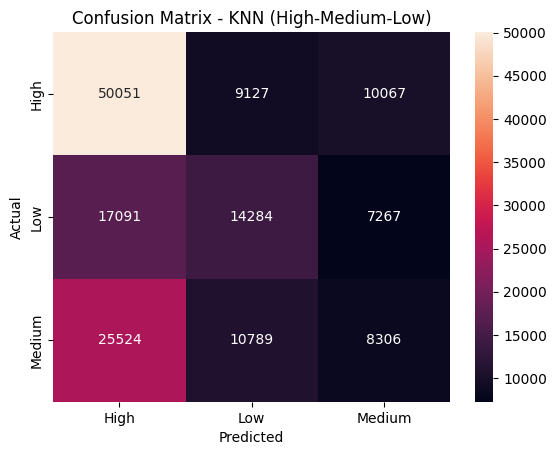

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_hml = KNeighborsClassifier()

# Train the model
knn_hml.fit(X_hml_train, y_hml_train)

# Make predictions on the validation and test sets
y_val_pred = knn_hml.predict(X_hml_val)
y_test_pred = knn_hml.predict(X_hml_test)

# Calculate accuracies
accuracy_knn_hml = accuracy_score(y_hml_val, y_val_pred)
test_accuracy_knn_hml = accuracy_score(y_hml_test, y_test_pred)
precision_knn_hml = precision_score(y_hml_val, y_val_pred, average="weighted")
recall_knn_hml = recall_score(y_hml_val, y_val_pred, average="weighted")

print("KNN (High-Medium-Low) validation accuracy:", accuracy_knn_hml)
print("KNN (High-Medium-Low) test accuracy:", test_accuracy_knn_hml)
print("KNN (High-Medium-Low) precision:", precision_knn_hml)
print("KNN (High-Medium-Low) recall:", recall_knn_hml)

print("Classification report:")
print(classification_report(y_hml_test, y_test_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_hml_test, y_test_pred)
sns.heatmap(
    cm, annot=True, fmt="d",
    xticklabels=knn_hml.classes_, # type: ignore
    yticklabels=knn_hml.classes_ # type: ignore
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (High-Medium-Low)")
plt.show()

#### Interpretation of KNN Model Performance for High-Medium-Low Response

For the High-Medium-Low classification, the KNN model performed poorly, with a validation accuracy of only **47.92%**. This suggests that KNN struggled to correctly differentiate between three classes (High, Medium, Low). This is likely due to the complexity of the task and the overlap in feature space for the middle class (Grade C loans).

- KNN worked reasonably well for the binary High-Low classification but underperformed in the multi-class setting.
- KNN's performance could potentially improve with careful tuning of the number of neighbors and distance metrics, but overall, it seems less effective than logistic regression for this dataset.

#### Hyperparameter tuning for KNeighborsClassifier using Grid Search Cross-Validation for High-Medium-Low response

The same hyperparameters were tuned for the High-Medium-Low response as for the High-Low response.

In [16]:
param_grid = {"n_neighbors": [5, 7, 9, 11], "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_hml, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

grid_search_knn.fit(X_hml_train, y_hml_train)
best_knn_hml = grid_search_knn.best_estimator_

print("Best parameters:", grid_search_knn.best_params_)
print("Best score:", grid_search_knn.best_score_)
print("Best estimator:", best_knn_hml)

results = pd.DataFrame(grid_search_knn.cv_results_)
display(results)

Best parameters: {'n_neighbors': 11, 'weights': 'uniform'}
Best score: 0.497798205179001
Best estimator: KNeighborsClassifier(n_neighbors=11)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.117273,0.532467,452.747068,61.757007,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.480192,0.478997,0.480069,0.480364,0.479703,0.479865,0.000485,6
1,8.187919,0.238667,448.249469,58.258819,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.468895,0.467258,0.467387,0.469952,0.467338,0.468166,0.001080,8
2,8.005034,0.669686,503.711059,60.815099,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.487484,0.487294,0.486989,0.487670,0.488281,0.487544,0.000432,4
3,6.162798,0.746145,459.071009,71.747372,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.480360,0.478217,0.477799,0.479738,0.478558,0.478935,0.000962,7
4,5.654891,0.407907,494.347686,67.309996,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.494158,0.491966,0.493340,0.494246,0.493775,0.493497,0.000830,2
5,5.726296,0.385423,479.521862,65.516162,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.487168,0.484133,0.485914,0.487389,0.485029,0.485926,0.001241,5
6,5.628236,0.521726,449.662510,66.107037,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.498851,0.496505,0.497752,0.498574,0.497309,0.497798,0.000851,1
7,5.567343,0.625043,342.830986,42.127739,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.493259,0.490695,0.491619,0.492272,0.490003,0.491569,0.001146,3


The best combination was found to be `n_neighbors = 11` and `weights = 'uniform'` for the High-Medium-Low response. However, the model's performance remained suboptimal, with an accuracy of only **49.78%**.

#### ROC Curve and AUC for the KNeighborsClassifier Model for High-Medium-Low response

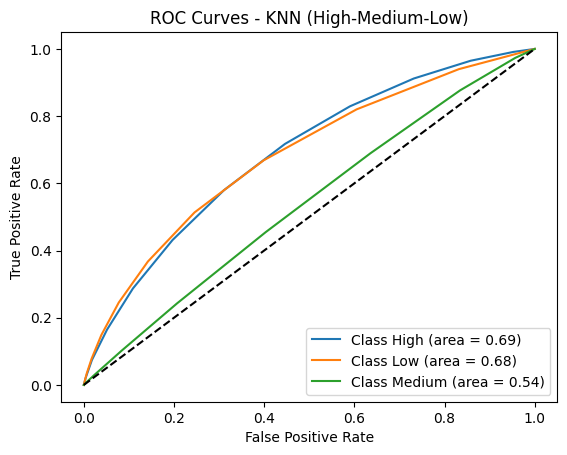

In [17]:
from sklearn.preprocessing import label_binarize

# Predict on validation set using the best model
y_hml_val_pred_knn = best_knn_hml.predict(X_hml_val)
y_hml_val_proba_knn = best_knn_hml.predict_proba(X_hml_val)

# Binarize the output
classes = best_knn_hml.classes_
y_hml_val_binarized = label_binarize(y_hml_val, classes=classes)
y_hml_val_proba_knn = best_knn_hml.predict_proba(X_hml_val)

# Compute ROC curve and AUC for each class
fpr_knn_hml = dict()
tpr_knn_hml = dict()
roc_auc_knn_hml = dict()

for i, class_label in enumerate(classes):
    fpr_knn_hml[i], tpr_knn_hml[i], _ = roc_curve(y_hml_val_binarized[:, i], y_hml_val_proba_knn[:, i])  # type: ignore
    roc_auc_knn_hml[i] = auc(fpr_knn_hml[i], tpr_knn_hml[i])

# Plot ROC curves for each class
plt.figure()

for i, class_label in enumerate(classes):
    plt.plot(fpr_knn_hml[i], tpr_knn_hml[i], label=f"Class {class_label} (area = {roc_auc_knn_hml[i]:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - KNN (High-Medium-Low)")
plt.legend(loc="lower right")
plt.show()

For the High-Medium-Low KNN model, ROC curves were calculated for each class separately (High, Medium, Low).
The AUC values for each class were lower than expected, particularly for the Medium class, where the model struggled to distinguish between "Medium" and "Low" loans, contributing to an overall lower accuracy.
KNN is a non-parametric model that struggles in high-dimensional space, especially with imbalanced classes. Its AUC score reflects its difficulty in distinguishing between classes effectively, particularly in the High-Medium-Low classification.

### 3.d Build two SGDClassifier models predicting both responses (High-Low and High-Medium-Low)

#### Train and predict High-Low response using SGDClassifier model

SGD (High-Low) validation accuracy: 0.7236342064772074
SGD (High-Low) test accuracy: 0.7268252894231928
SGD (High-Low) precision: 0.7477474081055608
SGD (High-Low) recall: 0.8592967001227525
Classification report:
              precision    recall  f1-score   support

        High       0.75      0.86      0.80     69245
         Low       0.66      0.49      0.56     38642

    accuracy                           0.73    107887
   macro avg       0.71      0.67      0.68    107887
weighted avg       0.72      0.73      0.72    107887



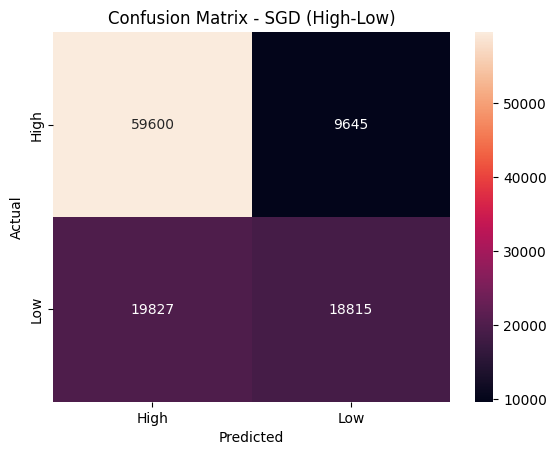

In [12]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD model
# max_iter is set to 1000 to ensure convergence which means the model will run for a maximum of 1000 iterations
# random_state is set to 42 to ensure reproducibility of the results across different runs
sgd_hl = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)

# Train the model
sgd_hl.fit(X_hl_train, y_hl_train)

# Make predictions on the validation and test sets
y_test_pred = sgd_hl.predict(X_hl_test)
y_val_pred = sgd_hl.predict(X_hl_val)

accuracy_sgd_hl = accuracy_score(y_hl_val, y_val_pred)
test_accuracy_sgd_hl = accuracy_score(y_hl_test, y_test_pred)
precision_sgd_hl = precision_score(y_hl_val, y_val_pred, pos_label="High")
recall_sgd_hl = recall_score(y_hl_val, y_val_pred, pos_label="High")

print("SGD (High-Low) validation accuracy:", accuracy_sgd_hl)
print("SGD (High-Low) test accuracy:", test_accuracy_sgd_hl)
print("SGD (High-Low) precision:", precision_sgd_hl)
print("SGD (High-Low) recall:", recall_sgd_hl)

print("Classification report:")
print(classification_report(y_hl_test, y_test_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_hl_test, y_test_pred)
sns.heatmap(
    cm, annot=True, fmt="d",
    xticklabels=sgd_hl.classes_, # type: ignore
    yticklabels=sgd_hl.classes_ # type: ignore
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SGD (High-Low)")
plt.show()

#### Interpretation of SGDClassifier Model Performance for High-Low Response

The SGDClassifier (Stochastic Gradient Descent) performed comparably to logistic regression, achieving a **72.68%** test accuracy. It uses an **iterative optimization approach** to minimize the loss function, which allows it to handle large-scale data efficiently.

The precision of **74.77%** and recall of **85.93%** suggest that SGDClassifier is also effective at identifying **"High" loans**, although it misses more **"Low" loans**, similar to logistic regression. The model might be favoring a larger proportion of High-grade loans, which aligns with the business need to prioritize identifying lower-risk loans.

#### Hyperparameter tuning for SGDClassifier using Grid Search Cross-Validation for High-Low response
Hyperparameters Tuned:

- **alpha**: This controls the strength of the regularization, similar to the C parameter in logistic regression. Higher values of alpha indicate stronger regularization.
- **penalty**: Regularization method (**L2**, **L1**, or **elasticnet**), which helps prevent overfitting by adding a penalty term for large coefficients.
- **loss**: The type of loss function used. In this case, `log_loss` (logistic regression) was chosen as it is appropriate for classification tasks.

In [19]:
param_grid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l2", "l1", "elasticnet"],
    "loss": ["log_loss"]
}

sgd_hl = SGDClassifier(max_iter=1000, random_state=42)
sgd_hl_cv = GridSearchCV(sgd_hl, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
sgd_hl_cv.fit(X_hl_train, y_hl_train)
best_sgd_hl = sgd_hl_cv.best_estimator_

print("Best parameters:", sgd_hl_cv.best_params_)
print("Best score:", sgd_hl_cv.best_score_)
print("Best estimator:", best_sgd_hl)

results = pd.DataFrame(sgd_hl_cv.cv_results_)
display(results)

Best parameters: {'alpha': 0.0001, 'loss': 'log_loss', 'penalty': 'l2'}
Best score: 0.7271629455451531
Best estimator: SGDClassifier(loss='log_loss', random_state=42)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.905268,0.115068,0.298409,0.024452,0.0001,log_loss,l2,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.728514,0.726856,0.726031,0.726220,0.728194,0.727163,0.001015,1
1,1.907075,0.164111,0.301839,0.012988,0.0001,log_loss,l1,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.728594,0.727918,0.723926,0.722863,0.725711,0.725802,0.002211,6
2,2.233027,0.082492,0.346244,0.046305,0.0001,log_loss,elasticnet,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.728574,0.728008,0.725823,0.726458,0.725582,0.726889,0.001193,2
3,1.581846,0.057137,0.284695,0.004329,0.0010,log_loss,l2,"{'alpha': 0.001, 'loss': 'log_loss', 'penalty'...",0.726866,0.726468,0.724899,0.726468,0.727131,0.726366,0.000776,4
4,1.923436,0.054576,0.307036,0.005274,0.0010,log_loss,l1,"{'alpha': 0.001, 'loss': 'log_loss', 'penalty'...",0.726846,0.726329,0.725157,0.726170,0.727111,0.726323,0.000675,5
5,1.833247,0.101934,0.318302,0.018082,0.0010,log_loss,elasticnet,"{'alpha': 0.001, 'loss': 'log_loss', 'penalty'...",0.726905,0.726727,0.724790,0.726677,0.727181,0.726456,0.000851,3
6,1.583604,0.122404,0.289452,0.019463,0.0100,log_loss,l2,"{'alpha': 0.01, 'loss': 'log_loss', 'penalty':...",0.725376,0.724999,0.723767,0.725018,0.724887,0.724809,0.000546,8
7,1.780959,0.182953,0.306400,0.021689,0.0100,log_loss,l1,"{'alpha': 0.01, 'loss': 'log_loss', 'penalty':...",0.723926,0.722317,0.722665,0.722685,0.722990,0.722916,0.000548,9
8,1.664833,0.129695,0.310452,0.026686,0.0100,log_loss,elasticnet,"{'alpha': 0.01, 'loss': 'log_loss', 'penalty':...",0.725088,0.725098,0.723956,0.725277,0.724906,0.724865,0.000469,7
9,1.506096,0.082243,0.316012,0.023862,0.1000,log_loss,l2,"{'alpha': 0.1, 'loss': 'log_loss', 'penalty': ...",0.700965,0.701422,0.701174,0.701124,0.701916,0.701320,0.000332,10


The best parameters were `alpha = 0.0001`, `penalty = L2`, and `loss = log_loss` for both the High-Low and High-Medium-Low classification tasks.
A smaller alpha value provided the best results, allowing the model to fit the data without over-penalizing important features.

The **L2 regularization** (Ridge regression) was selected, which penalizes large coefficients and encourages a smoother decision boundary. This works well for high-dimensional data where many features might contribute to the classification. The smaller alpha value prevents excessive penalization, helping the model maintain flexibility while reducing overfitting.

#### ROC Curve and AUC for the SGDClassifier Model for High-Low response

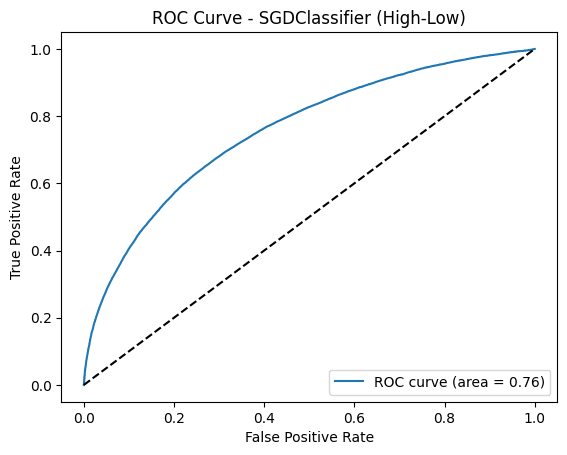

In [20]:
# Predict on validation set using the best model
y_hl_val_pred_sgd = best_sgd_hl.predict(X_hl_val)
y_hl_val_proba_sgd = best_sgd_hl.predict_proba(X_hl_val)[:, 1]

# Compute ROC curve and AUC
fpr_sgd, tpr_sgd, _ = roc_curve(y_hl_val, y_hl_val_proba_sgd, pos_label="Low")
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)

# Plot ROC curve
plt.figure()
plt.plot(fpr_sgd, tpr_sgd, label=f"ROC curve (area = {roc_auc_sgd:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SGDClassifier (High-Low)")
plt.legend(loc="lower right")
plt.show()

The ROC curve for SGDClassifier (High-Low) yielded an AUC value of **0.76**, same as logistic regression, suggesting it is similarly effective in distinguishing between the two classes.

#### Train and predict High-Medium-Low response using SGDClassifier model

SGD (High-Medium-Low) validation accuracy: 0.5126290113175875
SGD (High-Medium-Low) test accuracy: 0.513192923557106
SGD (High-Medium-Low) precision: 0.46130596417405717
SGD (High-Medium-Low) recall: 0.5126290113175875
Classification report:
              precision    recall  f1-score   support

        High       0.53      0.86      0.66     69245
         Low       0.46      0.45      0.45     38642
      Medium       0.38      0.03      0.05     44619

    accuracy                           0.51    152506
   macro avg       0.46      0.45      0.39    152506
weighted avg       0.47      0.51      0.43    152506



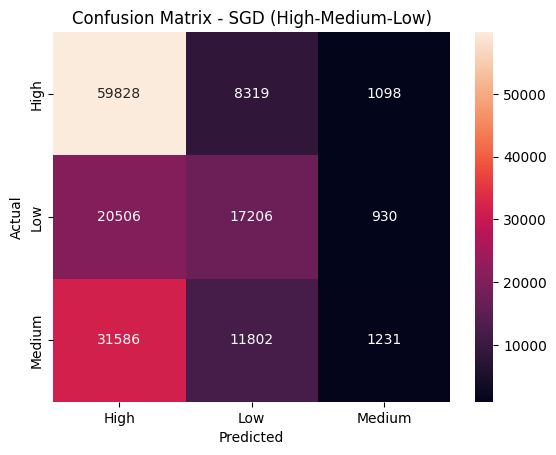

In [13]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD model
sgd_hml = SGDClassifier(loss="log_loss")

# Train the model
sgd_hml.fit(X_hml_train, y_hml_train)

# Make predictions on the validation and test sets
y_test_pred = sgd_hml.predict(X_hml_test)
y_val_pred = sgd_hml.predict(X_hml_val)

accuracy_sgd_hml = accuracy_score(y_hml_val, y_val_pred)
test_accuracy_sgd_hml = accuracy_score(y_hml_test, y_test_pred)
precision_sgd_hml = precision_score(y_hml_val, y_val_pred, average="weighted")
recall_sgd_hml = recall_score(y_hml_val, y_val_pred, average="weighted")

print("SGD (High-Medium-Low) validation accuracy:", accuracy_sgd_hml)
print("SGD (High-Medium-Low) test accuracy:", test_accuracy_sgd_hml)
print("SGD (High-Medium-Low) precision:", precision_sgd_hml)
print("SGD (High-Medium-Low) recall:", recall_sgd_hml)

print("Classification report:")
print(classification_report(y_hml_test, y_test_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_hml_test, y_test_pred)
sns.heatmap(
    cm, annot=True, fmt="d",
    xticklabels=sgd_hml.classes_, # type: ignore
    yticklabels=sgd_hml.classes_ # type: ignore
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SGD (High-Medium-Low)")
plt.show()

#### Interpretation of SGDClassifier Model Performance for High-Medium-Low Response
For the High-Medium-Low classification, SGDClassifier performed slightly better than KNN, with a test accuracy of **51.11%**. This result, while still low, indicates that SGD's linear decision boundaries might help separate the three classes more effectively than KNN’s neighborhood-based approach, although the task remains challenging due to the complexity of separating three classes.

- `SGDClassifier` is a fast and efficient alternative to logistic regression for large datasets and achieves similar performance in binary classification tasks.
- For multi-class classification, the model needs improvement, as it struggles with accurately identifying the middle class (C).

#### Hyperparameter tuning for SGDClassifier using Grid Search Cross-Validation for High-Medium-Low response

The similar hyperparameters were chosen for the High-Medium-Low as for the High-Low response.

In [22]:
param_grid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l2", "l1", "elasticnet"],
    "loss": ["log_loss"]
}

sgd_hml = SGDClassifier(max_iter=1000, random_state=42)
sgd_hml_cv = GridSearchCV(sgd_hml, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
sgd_hml_cv.fit(X_hml_train, y_hml_train)
best_sgd_hml = sgd_hml_cv.best_estimator_

print("Best parameters:", sgd_hml_cv.best_params_)
print("Best score:", sgd_hml_cv.best_score_)
print("Best estimator:", best_sgd_hml)

results = pd.DataFrame(sgd_hml_cv.cv_results_)
display(results)

Best parameters: {'alpha': 0.001, 'loss': 'log_loss', 'penalty': 'l2'}
Best score: 0.5142266602027815
Best estimator: SGDClassifier(alpha=0.001, loss='log_loss', random_state=42)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.278270,0.599986,0.176292,0.015608,0.0001,log_loss,l2,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.512797,0.514385,0.512864,0.515934,0.514740,0.514144,0.001189,4
1,6.775250,0.580393,0.172938,0.009014,0.0001,log_loss,l1,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.511490,0.514462,0.513053,0.516826,0.514437,0.514054,0.001765,5
2,7.097722,0.560861,0.163305,0.008139,0.0001,log_loss,elasticnet,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.510942,0.514371,0.512674,0.514796,0.514381,0.513433,0.001443,6
3,5.177228,0.170238,0.172832,0.013293,0.0010,log_loss,l2,"{'alpha': 0.001, 'loss': 'log_loss', 'penalty'...",0.513001,0.515200,0.513320,0.515646,0.513967,0.514227,0.001035,1
4,6.180815,0.346876,0.162832,0.010036,0.0010,log_loss,l1,"{'alpha': 0.001, 'loss': 'log_loss', 'penalty'...",0.512951,0.515249,0.513524,0.515421,0.513651,0.514159,0.000990,2
5,6.435297,0.135740,0.178657,0.026062,0.0010,log_loss,elasticnet,"{'alpha': 0.001, 'loss': 'log_loss', 'penalty'...",0.512874,0.515108,0.513482,0.515491,0.513826,0.514156,0.000990,3
6,5.036824,0.186689,0.177151,0.023384,0.0100,log_loss,l2,"{'alpha': 0.01, 'loss': 'log_loss', 'penalty':...",0.511286,0.513113,0.512604,0.514135,0.513215,0.512871,0.000934,7
7,5.454103,0.201944,0.164003,0.013622,0.0100,log_loss,l1,"{'alpha': 0.01, 'loss': 'log_loss', 'penalty':...",0.508195,0.509867,0.509133,0.510152,0.508424,0.509154,0.000769,9
8,5.597243,0.185175,0.178045,0.013256,0.0100,log_loss,elasticnet,"{'alpha': 0.01, 'loss': 'log_loss', 'penalty':...",0.511539,0.513127,0.512674,0.513777,0.512808,0.512785,0.000730,8
9,4.665890,0.303630,0.168458,0.007626,0.1000,log_loss,l2,"{'alpha': 0.1, 'loss': 'log_loss', 'penalty': ...",0.494713,0.494819,0.494520,0.496094,0.495686,0.495166,0.000612,10


The best parameters were `alpha = 0.001`, `penalty = L2`, and `loss = log_loss` for High-Medium-Low response. It produced a test accuracy of **51.42%** which is not significantly better than the KNN model.

#### ROC Curve and AUC for the SGDClassifier Model for High-Medium-Low response

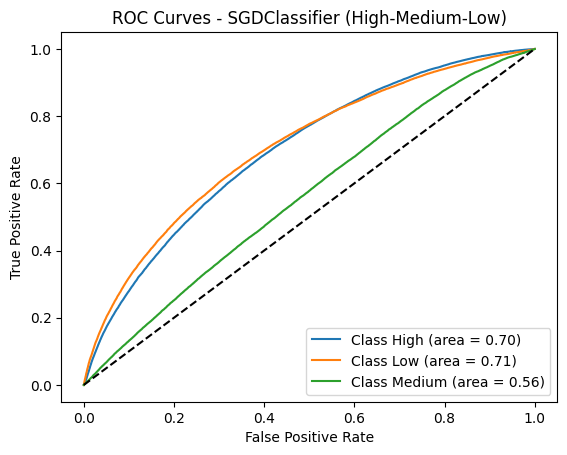

In [23]:
# Predict on validation set using the best model
y_hml_val_pred_sgd = best_sgd_hml.predict(X_hml_val)
y_hml_val_proba_sgd = best_sgd_hml.predict_proba(X_hml_val)

# Binarize the output
classes = best_sgd_hml.classes_
y_hml_val_binarized = label_binarize(y_hml_val, classes=classes)
y_hml_val_proba_sgd = best_sgd_hml.predict_proba(X_hml_val)

# Compute ROC curve and AUC for each class
fpr_sgd_hml = dict()
tpr_sgd_hml = dict()
roc_auc_sgd_hml = dict()
for i, class_label in enumerate(classes):
    fpr_sgd_hml[i], tpr_sgd_hml[i], _ = roc_curve(y_hml_val_binarized[:, i], y_hml_val_proba_sgd[:, i]) # type: ignore
    roc_auc_sgd_hml[i] = auc(fpr_sgd_hml[i], tpr_sgd_hml[i])

# Plot ROC curves for each class
plt.figure()

for i, class_label in enumerate(classes):
    plt.plot(fpr_sgd_hml[i], tpr_sgd_hml[i], label=f"Class {class_label} (area = {roc_auc_sgd_hml[i]:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - SGDClassifier (High-Medium-Low)")
plt.legend(loc="lower right")
plt.show()

For the High-Medium-Low SGD model, ROC curves were again plotted for each class. The AUC values were moderate for the High and Low classes, but much lower for the Medium class, similar to KNN.
But slightly better than KNN, the SGD model showed some improvement in distinguishing between High and Low loans, but still struggled with the Medium class. This indicates that the Medium class presents significant challenges for accurate classification in both models.

### 3.e Compare the accuracy of all final models

In [24]:
# Collect performance metrics
performance_data = {
    "Model": [
        "Logistic Regression (High-Low)",
        "KNN (High-Low)",
        "SGD (High-Low)",
        "KNN (High-Med-Low)", 
        "SGD (High-Med-Low)"
    ],
    "Validation Accuracy": [
        accuracy_log_reg,
        accuracy_knn_hl,
        accuracy_sgd_hl,
        accuracy_knn_hml,
        accuracy_sgd_hml
    ],
    "Test Accuracy": [
        test_accuracy_log_reg,
        test_accuracy_knn_hl,
        test_accuracy_sgd_hl,
        test_accuracy_knn_hml,
        test_accuracy_sgd_hml
    ],
    "Precision": [
        precision_log_reg,
        precision_knn_hl,
        precision_sgd_hl,
        precision_knn_hml,
        precision_sgd_hml
    ],
    "Recall": [
        recall_log_reg,
        recall_knn_hl,
        recall_sgd_hl,
        recall_knn_hml,
        recall_sgd_hml
    ]
}

performance_df = pd.DataFrame(performance_data)

print("Model Performance Comparison:")
display(performance_df)

Model Performance Comparison:


,Model,Validation Accuracy,Test Accuracy,Precision,Recall
0,Logistic Regression (High-Low),0.724274,0.726927,0.741637,0.875356
1,KNN (High-Low),0.705903,0.707583,0.746946,0.819380
2,SGD (High-Low),0.723634,0.726825,0.747747,0.859297
3,KNN (High-Med-Low),0.479168,0.476316,0.448102,0.479168
4,SGD (High-Med-Low),0.511475,0.511055,0.462957,0.511475


- **Logistic Regression (High-Low)** performed the best, with a test accuracy of **72.69%**, precision of **74.16%**, and the highest recall (**87.53%**). This suggests that it is particularly effective at identifying "High" grade loans, although it might overestimate the number of "High" grade loans due to its lower precision.
  
- **KNN (High-Low)** had a slightly lower test accuracy (**70.76%**) and performed worse in recall (**81.94%**) than logistic regression. However, its precision (**74.69%**) was marginally better, indicating better performance at correctly predicting "High" loans when it identifies them but fewer overall correct classifications.

- **SGD (High-Low)** was quite competitive with logistic regression, showing similar accuracy (**72.68%**) and a comparable balance between precision (**74.77%**) and recall (**85.93%**). 

For the **High-Medium-Low** models, the performance dropped significantly, particularly for KNN, which had a test accuracy of only **47.63%**. The SGD model slightly outperformed KNN with a test accuracy of **51.10%**, indicating that both models struggle with the additional complexity of classifying the middle grade (C). 

#### **Recommendation:**
Given the results, the **logistic regression model** seems to offer the best balance between accuracy, precision, and recall, particularly for the **High-Low** classification task. Its high recall for "High" grades makes it suitable for predicting the less risky loans, which could be critical for minimizing loan defaults. For the **High-Medium-Low** classification, the SGD model performed slightly better than KNN, but both models struggled with the multi-class task so further refinement of the models or additional features may be needed to improve performance.